# Analyse et détection de faux-billets

<img src="Images/billets_euros.png">


## Les données

J'ai  à ma disposition un jeu de données contenant les caractéristiques géométriques de billets de banque. Pour chacun d'eux, je connais :
- La longueur du billet (en mm)
- La largeur du billet mesurée sur le côté gauche (en mm)
- La largeur du billet mesurée sur le côté droit (en mm)
- La marge entre le bord supérieur du billet et l'image de celui-ci (en mm)
- La marge entre le bord inférieur du billet et l'image de celui-ci (en mm)
- La diagonale du billet (en mm)


## Partie 1 : Description des données
### Chargement et  préparation des données

In [1]:
# Manipulation
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Modélisation
from sklearn import decomposition # Regroupe les algos de décompositions matricielles, utilisé pour l'ACP
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Data\\billets.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
is_genuine      170 non-null bool
length          170 non-null float64
height_left     170 non-null float64
height_right    170 non-null float64
margin_low      170 non-null float64
margin_up       170 non-null float64
diagonal        170 non-null float64
dtypes: bool(1), float64(6)
memory usage: 8.2 KB


,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
5,True,172.57,104.65,104.44,4.54,2.99,113.16
6,True,172.38,103.55,103.80,3.97,2.90,113.30
7,True,171.58,103.65,103.37,3.54,3.19,113.38
8,True,171.96,103.51,103.75,4.06,3.33,113.53
9,True,172.14,104.34,104.20,4.63,3.02,112.47


In [3]:
print("NaN values in the Dataframe ?")
print(df.isnull().values.any())

# Descriptive statistics for all the columns
df.describe(include='all')

NaN values in the Dataframe ?
False


,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,NaN,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,NaN,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,NaN,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,NaN,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,NaN,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500


Pour résumer, notre jeu de données contient 170 observations et 7 attributs. La colonne "is_genuine" est une variable booléenne indiquant l'authenticité de la monnaie papier. Nous avons plus de vrais billets (100) que de faux (70).

### Analyses univariées

--------------------
Analyse univariée de l'attribut : length

Indicateurs de tendance centrale 
moy:
 171.94058823529414
med:
 171.945
mod:
 [172.1]
var:
 0.09294435986159198
ect:
 0.3048677743901313


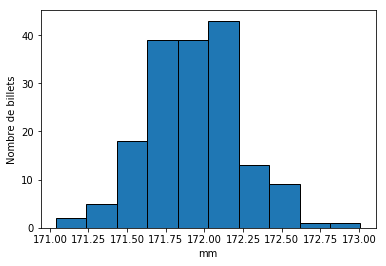

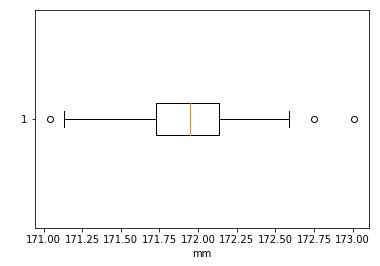

--------------------
Analyse univariée de l'attribut : height_left

Indicateurs de tendance centrale 
moy:
 104.0663529411764
med:
 104.055
mod:
 [104.17 104.32]
var:
 0.08839140484429073
ect:
 0.29730692027648925


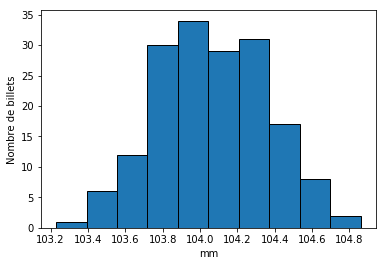

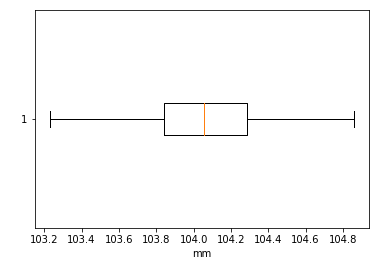

--------------------
Analyse univariée de l'attribut : height_right

Indicateurs de tendance centrale 
moy:
 103.92811764705884
med:
 103.95
mod:
 [103.76 104.06]
var:
 0.10890351557093421
ect:
 0.33000532657963905


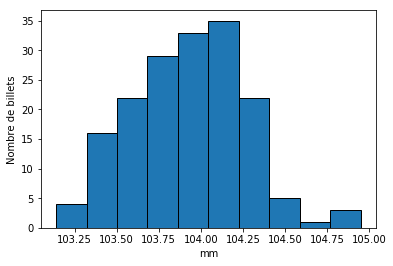

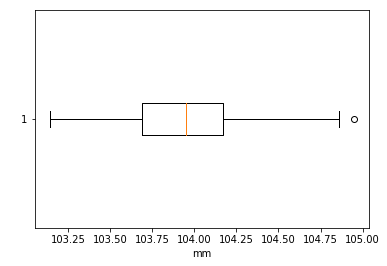

--------------------
Analyse univariée de l'attribut : margin_low

Indicateurs de tendance centrale 
moy:
 4.612117647058824
med:
 4.45
mod:
 [3.97 4.08]
var:
 0.490048456747405
ect:
 0.7000346111067688


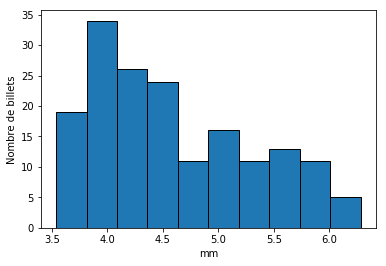

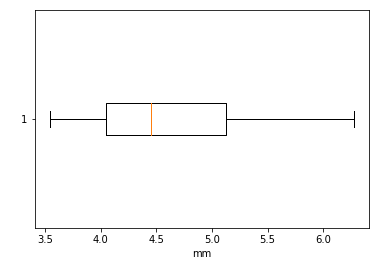

--------------------
Analyse univariée de l'attribut : margin_up

Indicateurs de tendance centrale 
moy:
 3.170411764705883
med:
 3.17
mod:
 [3.07 3.24]
var:
 0.05553806574394466
ect:
 0.23566515598183932


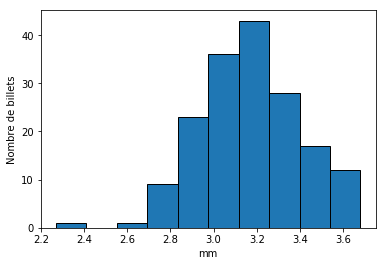

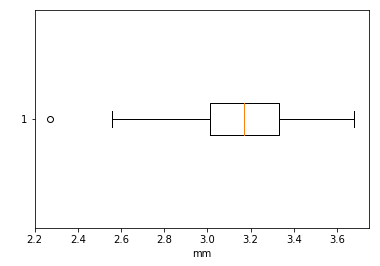

--------------------
Analyse univariée de l'attribut : diagonal

Indicateurs de tendance centrale 
moy:
 112.57041176470587
med:
 112.845
mod:
 [113.38]
var:
 0.8495768892733564
ect:
 0.9217249531575873


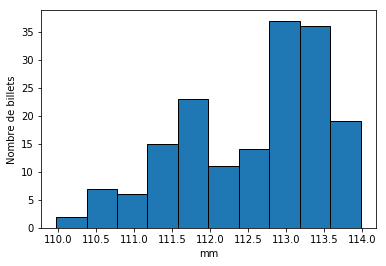

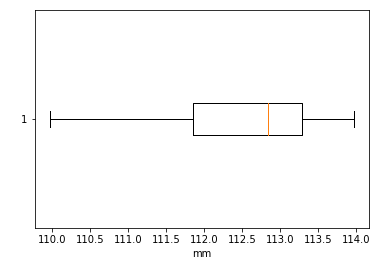

In [4]:
for label, content in df[df.columns[1:]].iteritems():
    print("-"*20)
    print("Analyse univariée de l'attribut :", label)
    
    print("\nIndicateurs de tendance centrale ")
    print("moy:\n",content.mean())
    print("med:\n",content.median())
    print("mod:\n",content.mode().values)
    print("var:\n",content.var(ddof=0))
    print("ect:\n",content.std(ddof=0))

    plt.hist(content, edgecolor='black')
    plt.xlabel("mm")
    plt.ylabel("Nombre de billets")
    plt.show()
    
    plt.boxplot(content, vert=False)
    plt.xlabel("mm")
    plt.ylabel(" ")
    plt.show()

Commentaires : 
- Il y a peu de données aberrantes.
- Il est plus judicieux de séparer les vrais, des faux billet pour mieux les représenter graphiquement.

********************************************************************************
Analyse univariée de l'attribut length selon l'authenticité du billet
--------------------
Indicateurs de tendance centrale de la catégorie True
moy:
 171.97610000000003
med:
 172.005
mod:
 [171.81 172.14]
var:
 0.0939037900000006
ect:
 0.3064372529572744
--------------------
Indicateurs de tendance centrale de la catégorie False
moy:
 171.88985714285712
med:
 171.875
mod:
 [171.67 171.69 171.94 172.1 ]
var:
 0.08719855102040792
ect:
 0.2952940077624467


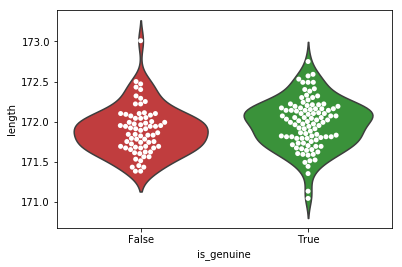

********************************************************************************
Analyse univariée de l'attribut height_left selon l'authenticité du billet
--------------------
Indicateurs de tendance centrale de la catégorie True
moy:
 103.95149999999998
med:
 103.91499999999999
mod:
 [103.74]
var:
 0.08688675000000023
ect:
 0.29476558482970877
--------------------
Indicateurs de tendance centrale de la catégorie False
moy:
 104.23042857142856
med:
 104.215
mod:
 [104.17 104.32]
var:
 0.04477553061224463
ect:
 0.21160229349476492


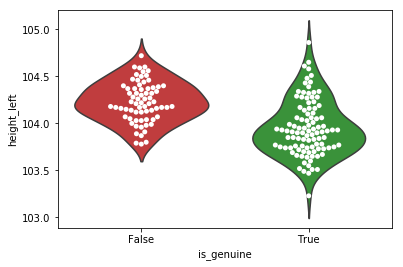

********************************************************************************
Analyse univariée de l'attribut height_right selon l'authenticité du billet
--------------------
Indicateurs de tendance centrale de la catégorie True
moy:
 103.77590000000002
med:
 103.76
mod:
 [103.76]
var:
 0.08464618999999995
ect:
 0.29094018285551404
--------------------
Indicateurs de tendance centrale de la catégorie False
moy:
 104.14557142857143
med:
 104.17
mod:
 [103.95 104.1  104.2  104.23 104.26]
var:
 0.06317038775510214
ect:
 0.2513371993062351


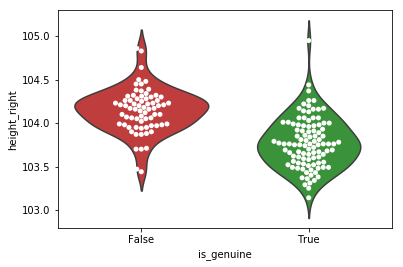

********************************************************************************
Analyse univariée de l'attribut margin_low selon l'authenticité du billet
--------------------
Indicateurs de tendance centrale de la catégorie True
moy:
 4.143500000000002
med:
 4.08
mod:
 [3.97 4.08]
var:
 0.09792674999999994
ect:
 0.3129325007090186
--------------------
Indicateurs de tendance centrale de la catégorie False
moy:
 5.281571428571428
med:
 5.265
mod:
 [4.88]
var:
 0.28833610204081644
ect:
 0.5369693678794131


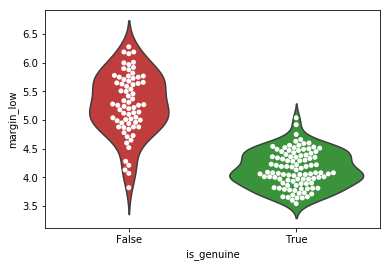

********************************************************************************
Analyse univariée de l'attribut margin_up selon l'authenticité du billet
--------------------
Indicateurs de tendance centrale de la catégorie True
moy:
 3.0555000000000003
med:
 3.07
mod:
 [3.07]
var:
 0.03870475
ect:
 0.19673522816211642
--------------------
Indicateurs de tendance centrale de la catégorie False
moy:
 3.3345714285714294
med:
 3.335
mod:
 [3.3]
var:
 0.033773387755102025
ect:
 0.18377537309199518


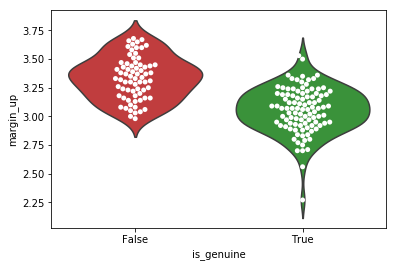

********************************************************************************
Analyse univariée de l'attribut diagonal selon l'authenticité du billet
--------------------
Indicateurs de tendance centrale de la catégorie True
moy:
 113.20720000000001
med:
 113.21
mod:
 [113.38]
var:
 0.14331415999999997
ect:
 0.37856856710508857
--------------------
Indicateurs de tendance centrale de la catégorie False
moy:
 111.6607142857143
med:
 111.765
mod:
 [111.55 111.94]
var:
 0.4516894897959185
ect:
 0.6720784848482493


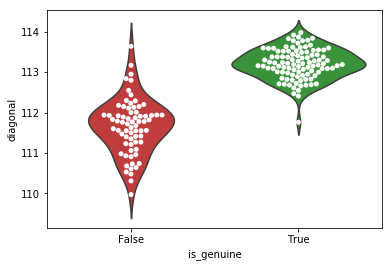

In [5]:
for label in df.columns[1:]:
    print("*"*80)
    print("Analyse univariée de l'attribut", label, "selon l'authenticité du billet")
    
    for cat in df["is_genuine"].unique():
        subset = df[df["is_genuine"] == cat] # Création du sous-échantillon
        print("-"*20)
        print("Indicateurs de tendance centrale de la catégorie " + str(cat))
        print("moy:\n",subset[label].mean())
        print("med:\n",subset[label].median())
        print("mod:\n",subset[label].mode().values)
        print("var:\n",subset[label].var(ddof=0))
        print("ect:\n",subset[label].std(ddof=0))
    
    ax = sns.violinplot(x="is_genuine", y=label, data=df, inner=None, palette=["C3", "C2"])
    ax = sns.swarmplot(x="is_genuine", y=label, data=df, color="white", edgecolor="gray")
    plt.show()

### Analyses bivariées

C:\Users\CGRM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


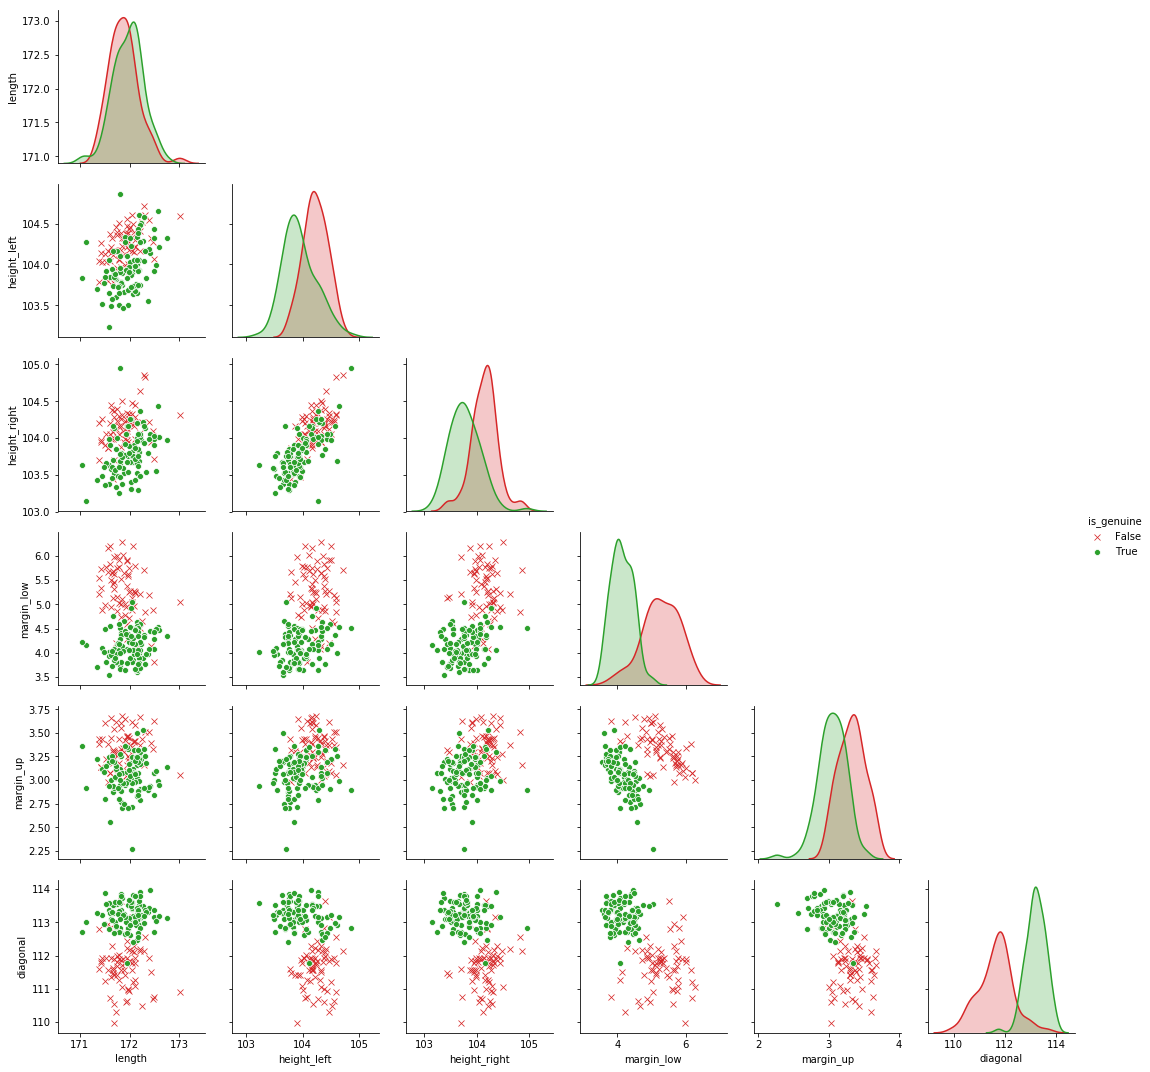

In [6]:
fig = sns.pairplot(df, hue="is_genuine", vars=[
    'length', 
    'height_left', 
    'height_right', 
    'margin_low',
    'margin_up',
    'diagonal'
], markers=["x", "o"], palette=["C3", "C2"])

# Remove the upper triangle
for i, j in zip(*np.triu_indices_from(fig.axes, 1)):
    fig.axes[i, j].set_visible(False)

plt.show()

Commentaires sur les distributions :
- margin_low et diagnonal -> Les distributions des vrais et des faux billets semblent les plus significativement différentes.
- Le reste -> Il y a des différences de moyennes et de variance mais cela reste moindre.

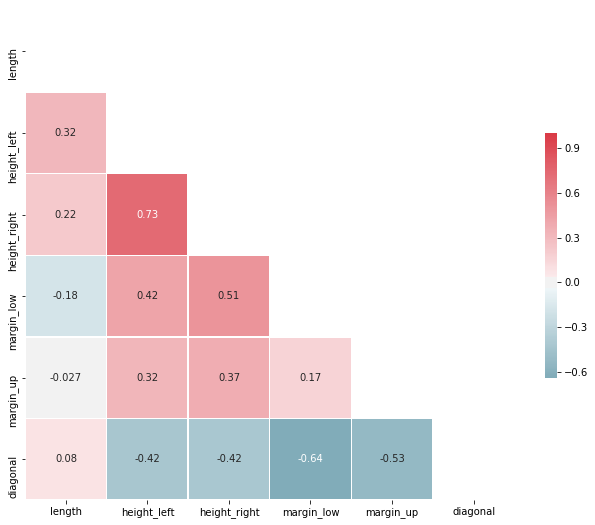

In [7]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html?highlight=correlation%20matrix
# Calculate the correlation matrix
corr = df.loc[:,'length':].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Notre matrice des corrélations et nos nuages de points nous donne l'occasion d'entreprendre du "feature engineering". Ici, nous voulons déterminer quelles variables garder pour notre régression logistique.

Il n'est pas étonnant que height_left et height_right soient très corrélées. Nous pouvons supprimer une des deux variables au moment de la classification supervisée car elles ont une relation linéaire.

## Partie 2 : Réalisation ACP

Nous n'allons pas entreprendre un centrage-réduction des données car les attributs sont exprimés dans la même unité.

In [8]:
X = df.values[:,1:] # On supprime les deux premières colonnes
print("X : ")
print(X)
print(X.shape)

# Calcul des composantes principales
pca = decomposition.PCA()
pca.fit(X) # Ajuste le modèle avec X
X_projected = pca.transform(X) # Applique la réduction de dimensionnalité à X
print("\nX_projected : ")
print(X_projected)
print(X_projected.shape)

X : 
[[171.81 104.86 104.95 4.52 2.89 112.83]
 [171.67 103.74 103.7 4.01 2.87 113.29]
 [171.83 103.76 103.76 4.4 2.88 113.84]
 ...
 [172.47 104.27 104.1 4.88 3.33 110.68]
 [171.82 103.97 103.88 4.73 3.55 111.87]
 [171.96 104.0 103.95 5.63 3.26 110.96]]
(170, 6)

X_projected : 
[[-0.00302108 -0.37513664  0.92154437 -0.62362766  0.63116862 -0.26155117]
 [-1.01124014  0.06937629 -0.33384399 -0.07020353  0.18191587 -0.15958881]
 [-1.23951059 -0.53730348 -0.2015937   0.01940629 -0.00436079 -0.09703314]
 ...
 [ 1.73293155  0.85121594  0.31447475  0.43599472 -0.00759365 -0.07426127]
 [ 0.65121413  0.36816641 -0.19237587 -0.1243017  -0.24258298  0.06138889]
 [ 1.85088613  0.10105292 -0.31769172  0.30471111 -0.09505495 -0.06317793]]
(170, 6)


### Analyse de l'éboulis des valeurs propres

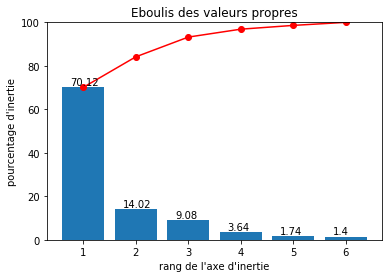

Somme des 3 premiers axes d'inertie : 93.22


In [9]:
eboulis = pca.explained_variance_ratio_*100
ranks = np.arange(len(eboulis))+1

# Affichage des éboulis
plt.bar(ranks, eboulis)

# Affichage de l'inertie pour chaque rang
for rank, ebouli in zip(ranks, eboulis):
    plt.text(rank - 0.25, ebouli + 1, round(ebouli, 2))

# Affichage des éboulis cumulés
plt.plot(ranks, eboulis.cumsum(),c="red",marker='o')

# Paramétrages supplémentaires du graphique
plt.ylim(0,100)
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

print("Somme des 3 premiers axes d'inertie :", round(eboulis.cumsum()[2], 2))

L'éboulis des valeurs propres nous montre que l'ACP est très satisfaisante. Le premier axe d'inertie contient plus des 2/3 de la variabilité totale des données, la somme des trois premiers, plus de 93%.


### Représentation des variables par le cercle des corrélations

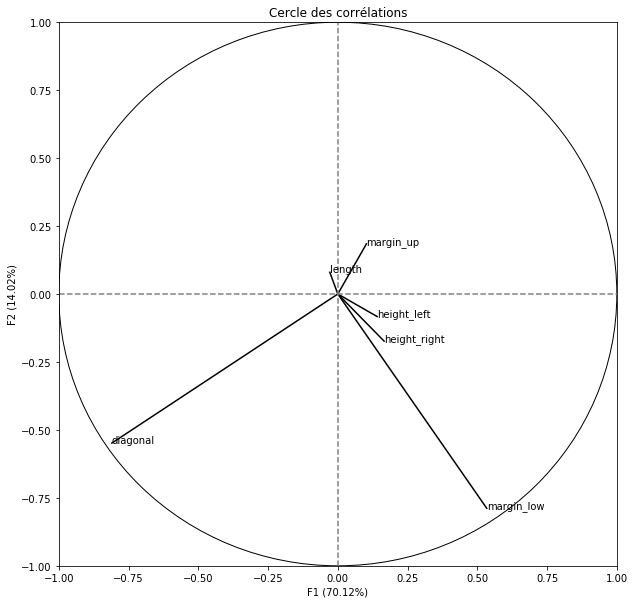

In [10]:
# Création du cercle des corrélations
pcs = pca.components_

# Définition de la taille du graphique
plt.figure(figsize=(10, 10))
corr_graph_size = [-1, 1]

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, df.columns[i + 1], fontsize='10')

    
# Afficher une ligne horizontale y=0
plt.plot(corr_graph_size, [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], corr_graph_size, color='grey', ls='--')

# Afficher le cercle
circle1=plt.Circle((0,0), 1, fill=False , edgecolor='black')
plt.gcf().gca().add_artist(circle1)

plt.xlim(corr_graph_size)
plt.ylim(corr_graph_size)
plt.xlabel("F1 (" + str(round(eboulis[0], 2)) + "%)")
plt.ylabel("F2 (" + str(round(eboulis[1], 2)) + "%)")
plt.title("Cercle des corrélations")

plt.show()

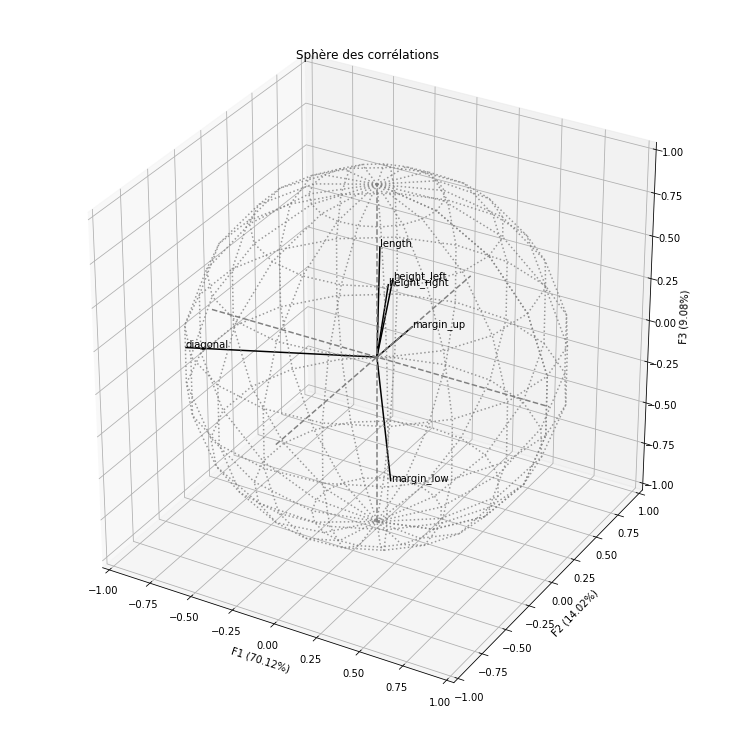

In [11]:
from mpl_toolkits.mplot3d import Axes3D # Pour créer des graphiques en 3D
# %matplotlib notebook

# Définition de la taille du graphique
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)

corr_graph_size = [-1.0, 1.0]

for i, (x, y, z) in enumerate(zip(pcs[0, :], pcs[1, :], pcs[2, :])):
    # Afficher un segment de l'origine au point (x, y)
    ax.plot([0, x], [0, y], [0, z], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    ax.text(x, y, z, df.columns[i + 1], fontsize='10')

    
# Afficher une ligne horizontale y=0
ax.plot(corr_graph_size, [0, 0], [0, 0], color='grey', ls='--')
ax.plot([0, 0], corr_graph_size, [0, 0], color='grey', ls='--')
ax.plot([0, 0], [0, 0], corr_graph_size, color='grey', ls='--')

# Dessiner la sphère
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="grey", alpha=0.8, linestyles=':')

ax.set_xlim3d(corr_graph_size)
ax.set_ylim3d(corr_graph_size)
ax.set_zlim3d(corr_graph_size)

ax.set_xlabel("F1 (" + str(round(eboulis[0], 2)) + "%)")
ax.set_ylabel("F2 (" + str(round(eboulis[1], 2)) + "%)")
ax.set_zlabel("F3 (" + str(round(eboulis[2], 2)) + "%)")
ax.set_title("Sphère des corrélations")

plt.show()

Interprétations des dimensions de l'ACP :
1. Le premier axe de variabilité représente la taille de la diagonale (corrélation de plus de 80 % avec cette dimension). Plus un individu a une valeur faible sur cet axe, plus grande est sa diagonale.
2. Le deuxième axe représente la marge entre le bord inférieur du billet et l'image de celui-ci (corrélation d'environ 80%). Plus un individu a une valeur faible sur cet axe, plus grande est cette marge inférieure.
3. Le troisième axe d'inertie représente la longueur du billet (corrélé à 60%) ainsi que la hauteur gauche et droite (toutes les deux corrélées à environ 50% avec l'axe). Cela semble logique de retrouver "length" après "diagonal"  ainsi qu'avant "height_left" et "height_right". En effet, la diagonale d'un rectangle est toujours plus longue que ces côtés. En outre, la longueur est toujours plus grande que la hauteur. Plus un individu a une valeur élevée sur cet axe, plus grandes sont sa longueur et sa hauteur.

### Représentation des individus par les plans factoriels

   is_genuine  length  height_left  height_right  margin_low  margin_up  \
0        True  171.81       104.86        104.95        4.52       2.89   
1        True  171.67       103.74        103.70        4.01       2.87   
2        True  171.83       103.76        103.76        4.40       2.88   
3        True  171.80       103.78        103.65        3.73       3.12   
4        True  172.05       103.70        103.75        5.04       2.27   

   diagonal  dim_acp1  dim_acp2  dim_acp3  
0    112.83 -0.003021 -0.375137  0.921544  
1    113.29 -1.011240  0.069376 -0.333844  
2    113.84 -1.239511 -0.537303 -0.201594  
3    113.63 -1.416897  0.165430 -0.156216  
4    113.55 -0.742004 -0.970984 -0.308274  


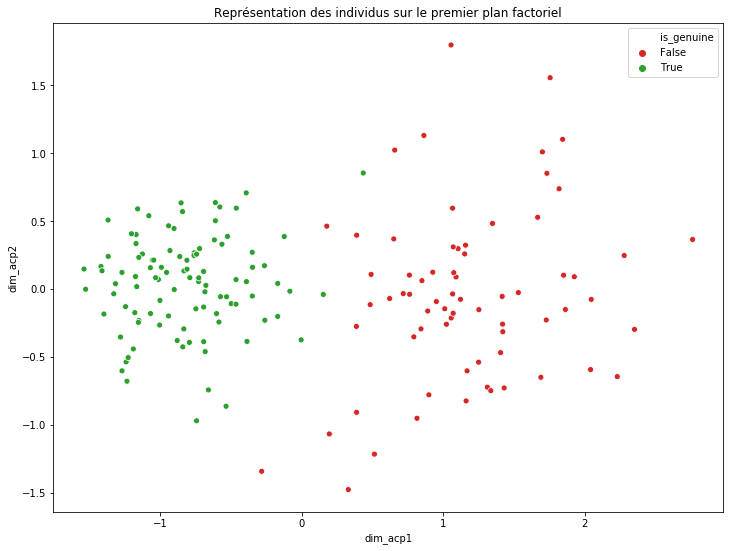

In [12]:
# Coordonnées des individus dans l'ACP
for i in range(0, 3) :
    df['dim_acp' + str(i + 1)] = X_projected[:, i]

# Vérification de l'opération 
print(df.head())

# Représentation des individus sur le premier plan factoriel
fig = plt.figure(figsize=(12, 9))
ax = sns.scatterplot(x="dim_acp1", 
                     y="dim_acp2", 
                     hue="is_genuine", 
                     data=df, 
                     palette=["C3", "C2"])

plt.title("Représentation des individus sur le premier plan factoriel")
plt.show()

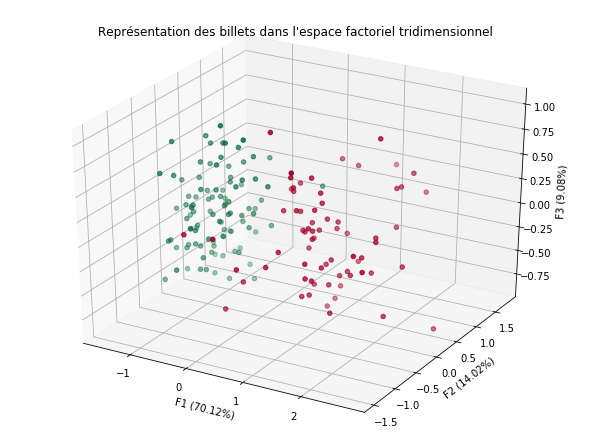

In [13]:
# %matplotlib notebook
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(df["dim_acp1"], 
           df["dim_acp2"], df["dim_acp3"], c=df["is_genuine"], cmap=plt.cm.RdYlGn)

ax.set_xlabel("F1 (" + str(round(eboulis[0], 2)) + "%)")
ax.set_ylabel("F2 (" + str(round(eboulis[1], 2)) + "%)")
ax.set_zlabel("F3 (" + str(round(eboulis[2], 2)) + "%)")
ax.set_title("Représentation des billets dans l'espace factoriel tridimensionnel")

plt.show()

### Analyse de la qualité de représentation et de la contribution des individus

#### Qualité de représentation des individus sur les axes

La qualité de représentation des individus sur les axes est le pourcentage d’inertie du chaque individu expliqué par chaque axe.

In [14]:
# Qualité de représentation des individus sur les axes - COS2
# Nombre d'observations
nb_indivs = X_projected.shape[0]

# Nombre de composantes étudiées
nb_comp = 3

# Calcul l’inertie de chaque individu pour chaque axe de projection 
cos2 = X_projected**2

# Calcul de la distance au carré de chaque individu
# C'est l'inertie totale de chaque individu
di = np.sum(X_projected**2,axis=1) # axis=1 pour faire la somme des colonnes

# Calcul du pourcentage d’inertie de chaque point expliqué par chaque axe.
for idx in range(6):
    cos2[:,idx] = cos2[:,idx] / di #
    if idx < nb_comp :
        df['cos2_' + str(idx + 1)] = cos2[:,idx]
    
# Vérification de la théorie - Somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

df[['cos2_1', 'cos2_2', 'cos2_3']].describe()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


,cos2_1,cos2_2,cos2_3
count,170.000000,170.000000,1.700000e+02
mean,0.642577,0.136043,1.208968e-01
std,0.270880,0.196424,1.662258e-01
min,0.000005,0.000002,4.277572e-07
25%,0.483417,0.010914,1.036733e-02
50%,0.716729,0.056407,6.049447e-02
75%,0.849862,0.168211,1.685223e-01
max,0.992679,0.906359,8.274210e-01


Commentaires sur la qualité de représentation des individus sur les axes :
- Les individus sont en moyennes représentés à plus de 77 % sur le premier plan factoriel. -> La perte d'informations est minime pour la plupart des individus.
- Plus de 75 % des observations ont un pourcentage d’inertie expliqué par le premier axe égal ou supérieur à 50%. -> Le premier axe représente la majorité de l'inertie pour la plupart des points

#### Contribution des individus aux axes

Calculer la contribution des individus aux axes (CTR) permet de déterminer les individus qui pèsent le plus dans la définition de chaque facteur.

In [15]:
# Contribution d’un individu à l’inertie d’un axe
# Valeur corrigée
eig_val = (nb_indivs-1)/nb_indivs*pca.explained_variance_

# Calcul de la contributions des individus aux axes
ctr = X_projected**2
for idx in range(nb_comp):
    ctr[:,idx] = ctr[:,idx]/(nb_indivs*eig_val[idx])
    df['ctr' + str(idx + 1)] = ctr[:,idx]

# Si le calcul est correct, les colonnes sont égales à 1
print(np.sum(ctr[:,0:3],axis=0))

[1. 1. 1.]


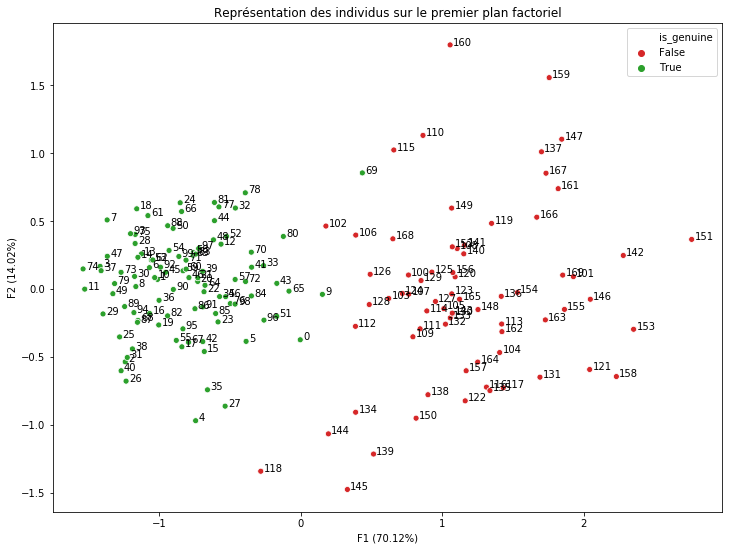

In [16]:
# Pour mieux situer les différents individus
# Représentation des individus sur le premier plan factoriel
fig = plt.figure(figsize=(12, 9))
ax = sns.scatterplot(x="dim_acp1", 
                     y="dim_acp2", 
                     hue="is_genuine", 
                     data=df, 
                     palette=["C3", "C2"])

# Création des étiquettes pour voir l'index de chaque billet
for idx, point in df.iterrows():
    ax.text(point['dim_acp1']+.02, point['dim_acp2'], idx)
                     
plt.xlabel("F1 (" + str(round(eboulis[0], 2)) + "%)")
plt.ylabel("F2 (" + str(round(eboulis[1], 2)) + "%)")
plt.title("Représentation des individus sur le premier plan factoriel")
plt.show()

In [17]:
# Affichage des individus qui contribuent le plus aux axes
df.loc[df[['ctr1', 'ctr2', 'ctr3']].idxmax()]

,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal,dim_acp1,dim_acp2,dim_acp3,cos2_1,cos2_2,cos2_3,ctr1,ctr2,ctr3
151,False,171.68,103.89,103.70,5.97,3.03,109.97,2.761911,0.363923,-0.858600,0.869132,0.015090,0.083994,0.037969,0.003297,0.028328
160,False,172.50,104.07,103.71,3.82,3.63,110.74,1.055601,1.795936,0.216960,0.244921,0.708937,0.010346,0.005546,0.080293,0.001809
5,True,172.57,104.65,104.44,4.54,2.99,113.16,-0.385559,-0.386870,1.020272,0.107396,0.108127,0.752032,0.000740,0.003726,0.040001


Pour les trois premières dimensions de l'ACP, l'individu qui contribue le plus a un axe d'inertie est celui qui est le plus éloigné de 0.

## Partie 3 : Classification et visualisation des groupes
### Choix de la méthode de classification et application

Le k-means (ou partitionnement en k-moyennes en français) fait partie de la famille des algorithmes de classification non-supervisée. Il a pour but de diviser des observations en k groupes dans lesquelles chaque observation appartient au groupe dont la moyenne est la plus proche. Son fonctionnement est simple (une image l'explique en-dessous) et il converge en général très rapidement.  Son principal désavantage est qu'il n'est pas capable de déterminer le nombre de classes optimal, il faut le donner à l'avance. Heureusement, ici on  le connaît, c'est deux. En effet, un pour les faux-billets et l'autre pour les billets authentiques. Par ailleurs, on a pu voir grâce à l'ACP que les deux groupes étaient suffisament à part. Nous ne sommes pas en face, par exemple, de cercles imbriqués les uns dans les autres.

<img src="Images/k_means_algo.jpg">

Sources :
- https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
- https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means
- https://www.datascience.com/blog/k-means-alternatives
- http://benalexkeen.com/k-means-clustering-in-python/
- https://www.datascience.com/blog/k-means-clustering

In [18]:
# Nombre de clusters souhaités
n_clust = 2

# Clustering par K-means
km = KMeans(n_clusters=n_clust, random_state=10)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_
df['km_cluster'] = clusters

### Analyse du résultat


In [19]:
# Nombre d'individus dans chaque cluster
# True positives False negatives etc
df['km_cluster'] = df['km_cluster'].astype(bool)
print("Comparaison globale des étiquettes originales et celles du k-means")
print(df[['is_genuine', 'km_cluster']].describe(), "\n")

for true_label in df["is_genuine"].unique():
    for km_label in df['km_cluster'].unique():
        subset = df[(df["is_genuine"] == true_label) & (df["km_cluster"] == km_label)]
        print("Nombre d'observations étiquettées", true_label, "dans le dataset et", km_label, "par le k-means :")
        print(len(subset.index))
        print("-"*20)

Comparaison globale des étiquettes originales et celles du k-means
       is_genuine km_cluster
count         170        170
unique          2          2
top          True       True
freq          100        101 

Nombre d'observations étiquettées True dans le dataset et True par le k-means :
99
--------------------
Nombre d'observations étiquettées True dans le dataset et False par le k-means :
1
--------------------
Nombre d'observations étiquettées False dans le dataset et True par le k-means :
2
--------------------
Nombre d'observations étiquettées False dans le dataset et False par le k-means :
68
--------------------


In [20]:
# Observations étiquettées True dans le dataset et False par le k-means
df[(df["is_genuine"] == True) & (df["km_cluster"] == False)]

,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal,dim_acp1,dim_acp2,dim_acp3,cos2_1,cos2_2,cos2_3,ctr1,ctr2,ctr3,km_cluster
69,True,171.94,104.11,104.16,4.08,3.35,111.76,0.435669,0.853433,0.178226,0.184666,0.708618,0.030904,0.000945,0.018131,0.001221,False


In [21]:
# Observations étiquettées True dans le dataset et False par le k-means
df[(df["is_genuine"] == False) & (df["km_cluster"] == True)]

,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal,dim_acp1,dim_acp2,dim_acp3,cos2_1,cos2_2,cos2_3,ctr1,ctr2,ctr3,km_cluster
102,False,171.94,104.21,104.10,4.28,3.47,112.23,0.178068,0.462124,0.226577,0.086607,0.583311,0.140222,0.000158,0.005316,0.001973,True
118,False,171.83,104.39,104.17,5.51,3.33,113.64,-0.282063,-1.342942,0.222159,0.036984,0.838380,0.022943,0.000396,0.044896,0.001897,True


Le K-means classifie bien les vrais et les faux billets mis à part 3 individus, il est donc performant. Afin de mieux de situer les faux positifs et les faux négatifs, nous allons visualiser le partionnement dans le premier plan factoriel.

### Visualisation de la partition obtenue dans le premier plan factoriel

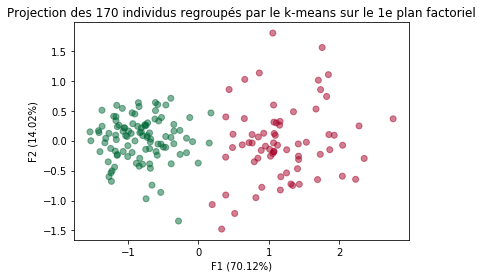

In [22]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap=plt.cm.RdYlGn, alpha=.5)

# Récupération des centroïdes
centroids = km.cluster_centers_

plt.xlabel("F1 (" + str(round(eboulis[0], 2)) + "%)")
plt.ylabel("F2 (" + str(round(eboulis[1], 2)) + "%)")
plt.title("Projection des {} individus regroupés par le k-means sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

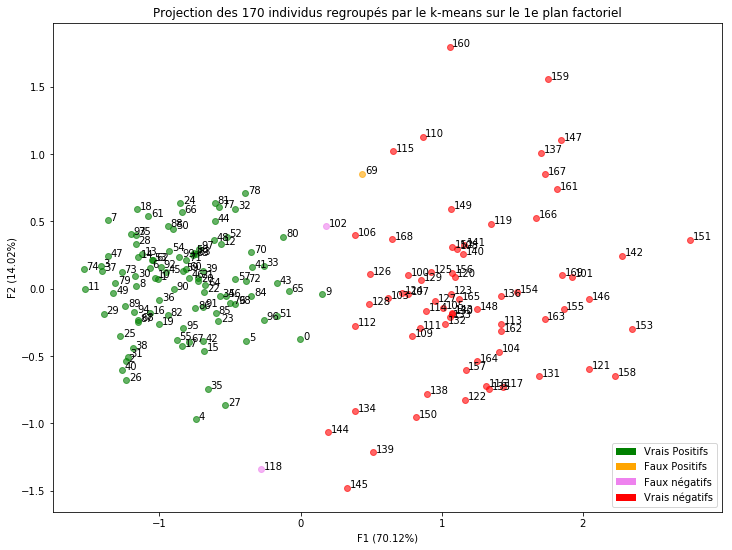

In [23]:
# Graph TT TF FT FF
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(12, 9))
classes = ['Vrais Positifs','Faux Positifs','Faux négatifs', 'Vrais négatifs']
class_colours = ['g','orange','violet', 'r']

i = 0

for true_label in df["is_genuine"].unique():
    for km_label in df['km_cluster'].unique():
        subset = df[(df["is_genuine"] == true_label) & (df["km_cluster"] == km_label)]
        plt.scatter(subset['dim_acp1'], subset['dim_acp2'], color=class_colours[i], alpha=.6)
        i = i + 1
        
# Création des étiquettes pour voir l'index de chaque billet
for idx, point in df.iterrows():
    plt.text(point['dim_acp1']+.02, point['dim_acp2'], idx)

# Ajout de la légende
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)

plt.xlabel("F1 (" + str(round(eboulis[0], 2)) + "%)")
plt.ylabel("F2 (" + str(round(eboulis[1], 2)) + "%)")
plt.title("Projection des {} individus regroupés par le k-means sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show()

### Analyse du résultat

Visuellement, on retrouve quasiment les mêmes groupes avec le k-means ou avec la variable "is_genuine". L'algorithme de classification a été lancé sur les données originales et non sur la projection issue de l'ACP. Cela veut dire que peu d'information a été perdue après la projection de l'ACP.

D'autre part, les faux positifs et les faux négatifs sont tous les deux respectivement proches des vrais positifs et des vrais négatifs. Cela explique pourquoi ils n'ont pas été bien classifiés par le k-means.

## Partie 4 : Modélisation des données à l'aide d'une régression logistique
### Création du modèle
La régression logistique est une méthode de classification supervisée, elle surtout utilisée pour prédire la classe d'une variable expliquée dans le cas où celle-ci a deux résultats possibles (ex : spam ou non-spam). La régression logistique prédit la probabilité d'occurrence d'un événement binaire en utilisant une fonction logit.

Dans notre cas, nous allons utiliser une régression logistique multiple binaire :
- Binaire -> La variable expliquée n'a que deux résultats possibles : vrai (billet) ou faux (billet).
- Multiple -> Nous allons nous appuyer sur plusieurs variables explicatives (ex: "length", "diagonal", etc)

Je vais implémenter le modèle pour détecter les faux-billets en utilisant les bibliothèques *Sckit-learn* et *Statsmodels*. Le désavantage de *Sckit-learn* par rapport à *Statsmodels* est qu'elle fonctionne un peu plus comme une boîte noire même si elle est de mon point de vue plus simple à prendre en main.

Sources :
- https://www.youtube.com/watch?v=zAULhNrnuL4
- https://www.youtube.com/watch?v=yIYKR4sgzI8
- http://shop.oreilly.com/product/0636920033400.do (CHAPTER 16 : Logistic Regression)
- http://www.data-mania.com/blog/logistic-regression-example-in-python/
- https://datascienceplus.com/building-a-logistic-regression-in-python-step-by-step/
- https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python
- https://pythonfordatascience.org/logistic-regression-python/
- http://blog.yhat.com/posts/logistic-regression-and-python.html

In [24]:
import statsmodels.api as sm 

#split dataset in features and target variable
sm_feature_cols = ['length', 'margin_low', 'diagonal']
sm_X_train = df[sm_feature_cols] # Features
sm_y_train = df.is_genuine # Target variable

# Logistic Regression
# sm_X_train = sm.add_constant(sm_X_train)
logit_mod = sm.Logit(sm_y_train, sm_X_train)

# fit the model
logit_res = logit_mod.fit(method='lbfgs', maxiter=1000)
print (logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Feb 2019   Pseudo R-squ.:                  0.9558
Time:                        11:40:04   Log-Likelihood:                -5.0874
converged:                       True   LL-Null:                       -115.17
                                        LLR p-value:                 1.549e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
length        -4.6736      1.653     -2.827      0.005      -7.914      -1.433
margin_low   -12.2059      4.204     -2.903      0.004     -20.446      -3.966
diagonal       7.6482      2.677      2.857      0.0

Commentaires sur mes tentatives de modélisation: 
- Le programme ne convergeait pas si on utilisait toutes les variables. En effet, les données sont totalement séparées, donc la MLE ne marche pas. Pour controurner ce problème, il faut utiliser une autre méthode ou supprimer des variables prédictrices.
- J'ai décide de reprendre ensuite les trois variables les plus essentielles de l'ACP ('length', 'margin_low', 'diagonal') après avoir testé de nombreuses configurations. C'est cette dernière qui donnait les résultats les plus satisfaisants en matière de valeur-p et de R².
- Il n'y a pas de constante car à chaque fois que j'en ajoutais une, sa p-valeur était proche de 100%.
- J'ai également essayé d'utiliser la régularisation mais cela ne changeait pas les résultats.

Commentaires sur la modélisation finale
- Les p-valeurs étant inférieures ou égales à 0,5% , il est improbable d’observer une association aussi substantielle entre les variable explicatives et la variable expliquée à cause du hasard, en l’absence de toute association réelle entre elles.
- R² nous indique que le modèle explique  plus de 95 % de la variabilité des données (proche de la somme cumulée des trois premières valeurs propres de l'ACP). On risque le sur-apprentissage (overfitting) en ajoutant d'autres variables explicatives.

Sources : 
- https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/
- https://hal.inria.fr/inria-00386639/document
- https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-pseudo-r-squareds/

In [25]:
# Test du modèle
df_test1 = pd.read_csv('Data\\exemple.csv')
sm_X_test = df_test1[sm_feature_cols]
df_test1['true_proba'] = logit_res.predict(sm_X_test)
df_test1

,length,height_left,height_right,margin_low,margin_up,diagonal,id,true_proba
0,171.76,104.01,103.54,5.21,3.30,111.42,B_1,7.048717e-07
1,171.87,104.17,104.13,6.00,3.31,112.09,B_2,4.597742e-09
2,172.00,104.58,104.29,4.99,3.39,111.57,B_3,1.060281e-05
3,172.49,104.55,104.34,4.44,3.03,113.20,B_4,9.956595e-01
4,171.65,103.63,103.56,3.77,3.16,113.33,B_5,1.000000e+00


In [26]:
# import the class
from sklearn.linear_model import LogisticRegression

#split dataset in features and target variable
sk_feature_cols = ['length', 'height_left', 'margin_low', 'margin_up', 'diagonal']
sk_X_train = df[sk_feature_cols] # Features
sk_y_train = df.is_genuine # Target variable

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=0, solver='lbfgs')

# fit the model with data
logreg.fit(sk_X_train, sk_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Test du modèle sur un fichier d'exemple

In [27]:
# Chargement du fichier d'exemple
df_test2 = pd.read_csv('Data\\exemple.csv')
sk_X_test = df_test2[sk_feature_cols]

# Prédiction sur le jeu de tests
df_test2['false_proba'] = logreg.predict_proba(sk_X_test)[:, 0]
df_test2['true_proba'] = logreg.predict_proba(sk_X_test)[:, 1]
df_test2['is_genuine'] = logreg.predict(sk_X_test)
df_test2

,length,height_left,height_right,margin_low,margin_up,diagonal,id,false_proba,true_proba,is_genuine
0,171.76,104.01,103.54,5.21,3.30,111.42,B_1,0.973855,0.026145,False
1,171.87,104.17,104.13,6.00,3.31,112.09,B_2,0.991732,0.008268,False
2,172.00,104.58,104.29,4.99,3.39,111.57,B_3,0.971499,0.028501,False
3,172.49,104.55,104.34,4.44,3.03,113.20,B_4,0.124164,0.875836,True
4,171.65,103.63,103.56,3.77,3.16,113.33,B_5,0.003785,0.996215,True
